In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [20]:
# Load the data
df = pd.read_csv('data/social_media_dataset.csv')

In [21]:
df.head()


,Platform,Hashtag,Content_Type,Impressions,Views,Likes,Shares,Comments,Engagement_Rate
0,TikTok,Music,Video,153973,75655,8760,2385,4208,0.2029
1,TikTok,Beauty,Video,178116,27357,21324,9454,6875,1.3764
2,TikTok,Education,Video,178751,87922,5802,4407,2529,0.1449
3,Twitter,Fitness,Carrousel,166543,88181,16065,4660,649,0.2424
4,Twitter,Gaming,Text,107985,61481,15830,4996,8138,0.4711


In [22]:
# Filter rows where the platform is 'TikTok'
tiktok_rows = df[df['Platform'] == 'TikTok']

# Randomly sample 72% of the TikTok rows
reduced_tiktok_rows = df[df['Platform'] == 'TikTok'].sample(frac=0.72, random_state=42)

# Combine the reduced TikTok rows with the rest of the dataframe
df = pd.concat([df[df['Platform'] != 'TikTok'], reduced_tiktok_rows])

In [23]:
# Filter rows where the platform is 'Facebook'
Facebook_rows = df[df['Platform'] == 'Facebook']

# Randomly sample 72% of the Facebook rows
reduced_Facebook_rows = df[df['Platform'] == 'Facebook'].sample(frac=0.86, random_state=42)

# Combine the reduced Facebook rows with the rest of the dataframe
df = pd.concat([df[df['Platform'] != 'Facebook'], reduced_Facebook_rows])

In [24]:
# Filter rows where the platform is 'Twitter'
Twitter_rows = df[df['Platform'] == 'Twitter']

# Randomly sample 72% of the Twitter rows
reduced_Twitter_rows = df[df['Platform'] == 'Twitter'].sample(frac=0.65, random_state=42)

# Combine the reduced Twitter rows with the rest of the dataframe
df = pd.concat([df[df['Platform'] != 'Twitter'], reduced_Twitter_rows])

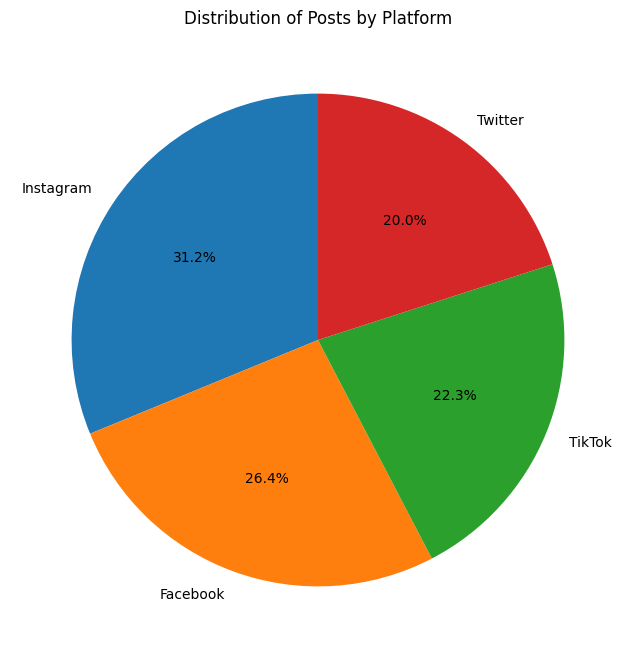

In [25]:
# Pie chart of Platforms
platform_counts = df['Platform'].value_counts()

plt.figure(figsize=(8, 8))
platform_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribution of Posts by Platform')
plt.ylabel('')  # Remove y-axis label for better appearance
plt.show()

In [ ]:
# Reduce the specified columns proportionally by 68% for Twitter rows
columns_to_reduce = ['Likes', 'Comments', 'Shares', 'Views', 'Impressions', 'Engagement_Rate']
reduced_Twitter_rows[columns_to_reduce] *= 0.68

In [ ]:
To reduce the `columns_to_reduce` randomly, you can apply a random reduction factor to each column for the rows in the specified DataFrame. Here's how you can do it:

```python
# Generate random reduction factors for each column
reduction_factors = np.random.uniform(0.5, 1.0, size=len(columns_to_reduce))

# Apply the reduction factors to the specified columns
for i, column in enumerate(columns_to_reduce):
    df[column] *= reduction_factors[i]
```

This will randomly reduce the values in the specified columns by a factor between 0.5 and 1.0. Adjust the range of `np.random.uniform` as needed.

In [26]:
columns_to_reduce = ['Likes', 'Comments', 'Shares', 'Views', 'Impressions', 'Engagement_Rate']


In [27]:
df.loc[df['Platform'] == 'TikTok', columns_to_reduce] *= 0.46

/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_92341/2190679648.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 1417.72  7664.52  4657.5  ... 10843.12  5653.86  2161.08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Platform'] == 'TikTok', columns_to_reduce] *= 0.46
/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_92341/2190679648.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1335.84  622.38 1223.6  ...  895.16 3575.58   55.2 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Platform'] == 'TikTok', columns_to_reduce] *= 0.46
/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_92341/2190679648.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will ra

In [28]:
df.loc[df['Platform'] == 'Facebook', columns_to_reduce] *= 0.27

In [29]:
df.loc[df['Platform'] == 'Twitter', columns_to_reduce] *= 0.68

In [30]:
df.to_csv('data/social_media_dataset2.csv', index=False)